### Determination of bandpass filter size

In [11]:
from pathlib import Path
import numpy as np
from nibabel.freesurfer.io import write_geometry
from fmri_tools.surface.mesh import Mesh
from fmri_tools.surface.filter import LaplacianGaussian
import os
import sys
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.sphere import Sphere
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

In [32]:
# parameters
SCALE = 7  # size of sphere in mm
SUBDIV = 5  # number of icosahedron subdivisions
T_VEC = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0]  # t values for fitting
N_ITER = 100
DIR_OUT = ""

# estimate mean filter cycle for different gaussian scales
period = np.zeros((N_ITER, len(T_VEC)))
for i in range(N_ITER):
    for j, t  in enumerate(T_VEC):
        sphere = Sphere(scale=SCALE)
        sphere.subdivide(SUBDIV)

        filter = LaplacianGaussian(sphere.vtx, sphere.fac, t)
        res = filter.spatial_scale(n_iter=1)
        period[i, j] = res["period"]  # in mm

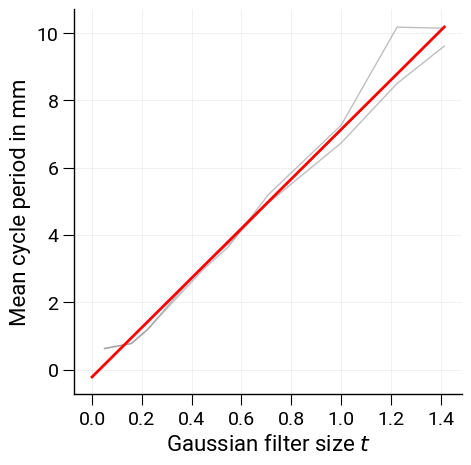

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(N_ITER):
    plt.plot(np.sqrt(T_VEC), period[i, :], color="gray", alpha=0.5, linewidth=1)

x, y = np.sqrt(T_VEC), np.mean(period, axis=0)
m, b = np.polyfit(x, y, 1)
x_fit = np.linspace(0, x[-1], 100)
y_fit = m * x_fit + b
plt.plot(x_fit, y_fit, color="red")

plt.xlabel(r'Gaussian filter size $t$')
plt.ylabel("Mean cycle period in mm")
plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)

# write output
if DIR_OUT:
    dir_out = Path(DIR_OUT)
    dir_out.mkdir(exist_ok=True)
    file_out = dir_out / "filter_sizes.svg"
    fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")

In [17]:
# filter sizes to use for project
T_VEC_USE = [0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0]

for t in T_VEC_USE:
    period = m * np.sqrt(t) + b
    print(f"t: {t}; period: {period}")

t: 0.025; period: 0.9296334326946054
t: 0.05; period: 1.4150774765146426
t: 0.075; period: 1.7875717924913979
t: 0.1; period: 2.101599027058178
t: 0.2; period: 3.0724871146982524
t: 0.3; period: 3.817475746651763
t: 0.4; period: 4.445530215785323
t: 0.5; period: 4.998857310906818
t: 1.0; period: 7.169829073414797
t: 2.0; period: 10.240046783482603
